In [ ]:
from PIL import Image, ImageOps
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import cv2
import cmapy

In [30]:
img = sitk.ReadImage('../data/MM_WHS/train_images/ct_train_1001_image.nii.gz', sitk.sitkFloat32)
# img = sitk.DICOMOrient(img,'PSR')
img = sitk.GetArrayFromImage(img)

In [44]:
def apply_custom_colormap(image_gray, cmap=plt.get_cmap('seismic')):

    assert image_gray.dtype == np.uint8, 'must be np.uint8 image'
    if image_gray.ndim == 3: image_gray = image_gray.squeeze(-1)

    # Initialize the matplotlib color map
    sm = plt.cm.ScalarMappable(cmap=cmap)

    # Obtain linear color range
    color_range = sm.to_rgba(np.linspace(0, 1, 256))[:,0:3]    # color range RGBA => RGB
    color_range = (color_range*255.0).astype(np.uint8)         # [0,1] => [0,255]
    color_range = np.squeeze(np.dstack([color_range[:,2], color_range[:,1], color_range[:,0]]), 0)  # RGB => BGR

    # Apply colormap for each channel individually
    channels = [cv2.LUT(image_gray, color_range[:,i]) for i in range(3)]
    return np.dstack(channels)



In [ ]:
image_gray = cv2.imread('imgs/slice1.png', cv2.IMREAD_GRAYSCALE)
image_bgr = apply_custom_colormap(image_gray, cmap=plt.get_cmap('bwr'))

plt.imshow('image with colormap', image_bgr)

In [32]:
img_colorized = cv2.applyColorMap(img[100].astype(np.uint8), cmapy.cmap('viridis0'))

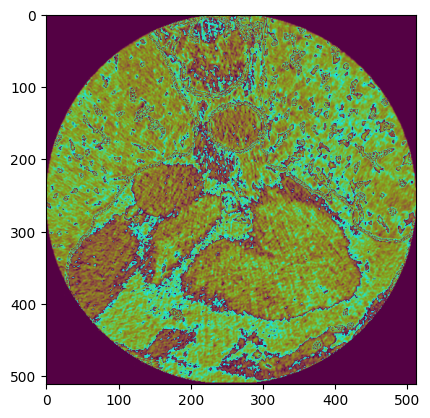

In [36]:
plt.imshow(img_colorized)

In [37]:
image_display = Image.fromarray(img_colorized)

In [ ]:
image_display = Image.fromarray(img[100, :, :])
plt.imsave('temp.png', image_display * 255, cmap='viridis', dtype=np.uint8)
image_display = mpimg.imread('temp.png')

In [10]:
image_display.shape

(512, 512, 4)

In [ ]:
image_display = Image.fromarray(image_display)